# Assignment 3

In the third assignment you will cluster hand-written digits using k-means. This is an unsupervised method and will therefore differ a bit from the previous assignments. 
You will also have to analyse the behavior of K-means for different parameter settings and initializations.

The assignment follows Andrew Ng's explanation of K-means and (re)watching his videos could be useful.

Publish your notebook (ipynb file) to your repository on Github. If you have any questions, please email Gosia and Rein and don't forget to commit the most recent version of you assignment on Github so that we can see your code.

Note: all code should be clear, add comments where necessary (especially if your code is not straightforward). You are free to discuss the assignment among each other, but stick to sharing ideas, not code.

### Deadline: December 1, 23:59

Do not hand in any other files, the Notebook should contain all your answers.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


The dataset is the same as with logistic regression. However, you don't need to use the class labels as K-means is an unsupervised method.

The numbers shown are: 
[[0 1 2 3 4]
 [5 6 7 8 9]]


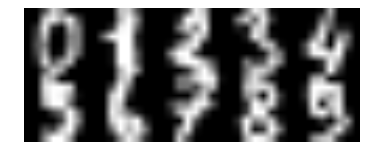

In [2]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=10)

#Create two rows with numbers
firstrow = np.hstack(digits.images[:5,:,:])
secondrow = np.hstack(digits.images[5:10,:,:])

plt.gray()
plt.axis('off')

#Show both rows at the same time
plt.imshow(np.vstack((firstrow,secondrow)))

#Show both rows at the same time using nearest-neighbor interpolation (pixelated image)
#plt.imshow(np.vstack((firstrow,secondrow)),  interpolation="nearest")

print "The numbers shown are: \n", np.vstack((digits.target[:5], digits.target[5:10]))

## Visualize functions

In order to make it more visible what K-means is learning, we provide two visualization functions. The first function takes the assignment of each digit to each cluster and shows what the digits of the cluster look like. If your algorithm works well then the digits should look alike!

The second function visualizes the actual cluster centroids. It is expected that you see something that resembles the original digit, but don't be surprised if one of the results is a combination, e.g. a zero and eight at the same time.

K-means is a very simple algorithm and is not likely to get an optimal result, therefore some of the centroids will be just noise. 

In [3]:
#With below code you can visualize the data clusters
#The input is a vector c (with all the datapoints assigned to a cluster)
#this function will show a bunch of numbers assigned to that cluster.
#It will skip the cluster if there are not enough images in it.

#You can use this code after you have finished implementing everything!
def visualize(best_c):
    for i in range(10):
        print "There are ", np.sum(c == i), " elements in cluster ", i
    
    for cluster in range(10):
        #Create two rows with numbers
        filtered = digits.images[c == cluster,:,:]

        if filtered.shape[0] < 5:
            print "not enough items in cluster ", cluster
            continue

        rows = np.floor(filtered.shape[0]/10)
        image_rows = []

        for i in range(min(5,int(rows))):
            image_row = np.hstack(filtered[i*10:(i+1)*10,:,:])
            image_rows.append(image_row)

        plt.gray()
        plt.axis('off')

        #Show both rows at the same time
        plt.imshow(np.vstack(image_rows))
        plt.show()

        print "The cluster shown above is: ", cluster

In [4]:
# This function visualizes the centroids. 
# It takes as input the matrix mu with the cluster centroids and shows an image.

#You can use this code after you have finished implementing everything!
def visualize_centroids(best_mu):
    mu = best_mu.T.reshape(10,8,8)
    
    #Create two rows with numbers
    firstrow = np.hstack(mu[:5,:,:])
    secondrow = np.hstack(mu[5:,:,:])

    plt.gray()
    plt.axis('off')

    #Show both rows at the same time
    plt.imshow(np.vstack((firstrow,secondrow)))

## The implementation

You have to implement the next three functions and fill in the body of the loop in order to create a correct implementation of k-means. Please follow Andrew Ng's description and the instructions that come with the functions closely. 

Think about the problem one step at a time. First focus on implementing the functions and only then start thinking about how they all come together. The skeleton code will guide you to make sure that it will come together. 

Grading:
- Working version of compute_centroid, update_centroid and cost_function (0.5 point each)
- A working triple loop that successfully learns and stores the best result (3 points)
- Correct use of both visualization functions on your best result and an explanation how you got to the best result and why it is necessary to have many initializations (1.5 points)

In [5]:
#Imports
import numpy as np

In [6]:
# Explination of the code. We get x which is a picture with the dimentions (8, 8) and we get the cluster centroids
# with shape (64, 1). First we transform x from (8, 8) t0 (64, 1). We then calculate the distance between each
# member of x and each cluster centroid and after normalizing this we return the index of the cluster centroid 
# of which the distance was the smallest. 

def compute_centroid(x,mu):
    """Takes an image, x with shape (8,8) and the cluster centroids with shape (64, 1) and return
    the index of the closest centroid"""
    x = np.reshape(x, (64,1))
    distance = np.subtract(mu, x)
    norm = np.linalg.norm(distance, axis=0)
    index = norm.argmin(axis=0)
    return index

# for testing

#mu = np.random.uniform(0,10,(64,10))
#x = np.reshape(digits.images[:1],(1,64))
# compute_centroid(x, mu)

In [7]:
# We get a centroid, so a number from one to ten in this case, all the cluster centroids and all data points that 
# belong the the centroid given to us first. We then take the average of all collums in X_c and update the matrix of
# all cluster centroids by setting the row of the specific centroid to be the average we just calculated. We then 
# return the updated mu matrix

def update_centroid(centroid, mu, X_c):
    """Takes a centroid, a cluster number from 1 to 10, the cluster centroids,
    mu with shape (64,k) and all the datapoints assigned to that cluster number, X_c.
    Return an updated mu matrix for that cluster number."""
    mu[:,centroid] = X_c.mean(0)
    return mu

# for testing

#c = np.random.randint(0,10,(1500)) 
#test_X_c = x[c==4]
#update_centroid(4, mu, test_X_c)

In [8]:
# We get x and reshape it to (64, 1) to calculated the distance between all items and the items of the cluster 
# centroids. After normalizing this we return the smallest distance. 

def cost_function(x,mu):
    """Takes an image, x with shape (8,8) and the cluster centroids with shape (64, 1). 
    Returns the minimum normalized distance."""
    x = np.reshape(x, (64,1))
    distance = np.subtract(mu, x)
    norm = np.linalg.norm(distance, axis=0)
    return np.amin(norm)

# for testing

#cost_funtion(x, mu)

In [9]:
initialisation_iterations = 10
iterations = 50
k = 10 #amount of clusters

x = np.reshape(digits.images[:1500],(1500,64))
x_test = np.reshape(digits.images[1500:],(297,64))

cost_c_and_mu = [] #A list with the costs of each inital itteration, and the corresponding c and mu

for h in range(initialisation_iterations):
    """This is the initialisation_iteration part which means we calcluate this part n times, 10 in this case
    because we don't want our code to accidently end up in a local minimum. By randomly initializing the starting
    points however we avoid this by calcluating the cost for each of the initial states and only using the 
    c and mu found by the initialization with the lowest cost."""
    
    mu = np.random.uniform(0,16,(64,k))
    c = np.random.randint(0,k,(1500))
    cost = 0
    
    for j in range(iterations):
        
        for i in range(k):
            mu = update_centroid(i, mu, x[c==i])
            
        for i in range(x.shape[0]):
            c[i] = compute_centroid(x[i,:], mu)
            cost += cost_function(x[i,:], mu)
    
    cost_c_and_mu.append([cost/x.shape[0], c, mu])

In [10]:
# Take the list with all the inital iterations and take the one with the lowest cost, 
# then take the corresponding c and mu as the optimal c and mu you want to visualise
optimal_c = sorted(cost_c_and_mu)[0][0]
optimal_mu = sorted(cost_c_and_mu)[0][2]

There are  119  elements in cluster  0
There are  73  elements in cluster  1
There are  355  elements in cluster  2
There are  174  elements in cluster  3
There are  167  elements in cluster  4
There are  153  elements in cluster  5
There are  154  elements in cluster  6
There are  74  elements in cluster  7
There are  73  elements in cluster  8
There are  158  elements in cluster  9


/Users/imac/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1797 but corresponding boolean dimension is 1500


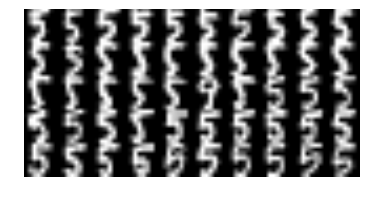

The cluster shown above is:  0


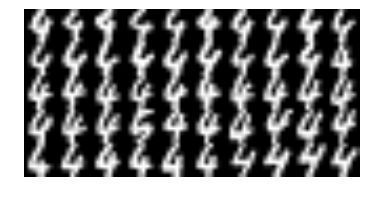

The cluster shown above is:  1


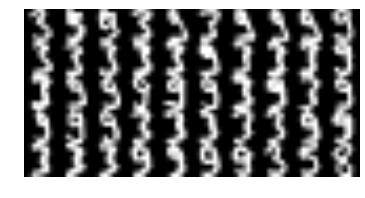

The cluster shown above is:  2


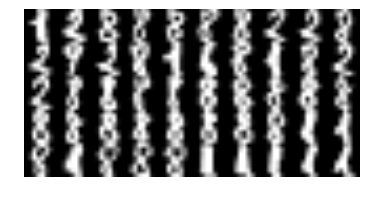

The cluster shown above is:  3


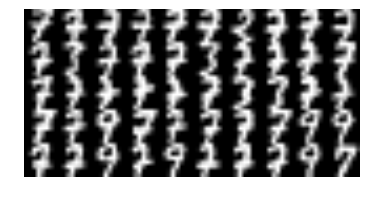

The cluster shown above is:  4


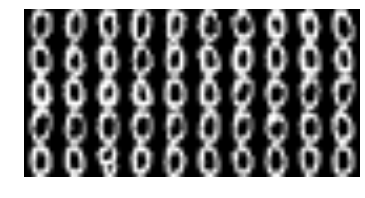

The cluster shown above is:  5


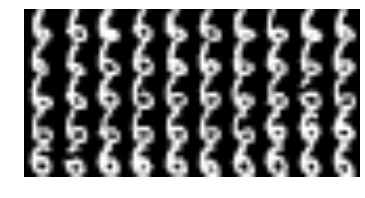

The cluster shown above is:  6


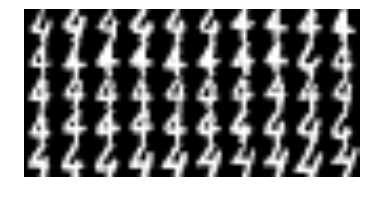

The cluster shown above is:  7


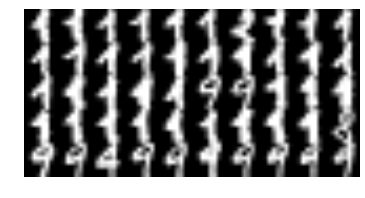

The cluster shown above is:  8


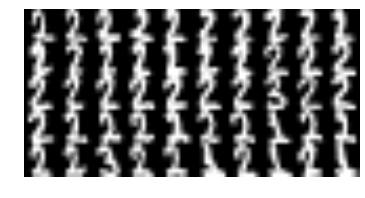

The cluster shown above is:  9


In [11]:
visualize(optimal_c)

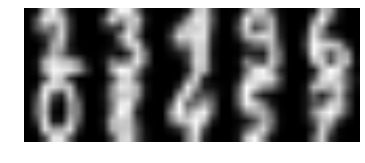

In [12]:
visualize_centroids(optimal_mu)

## Bonus

There is a special "trick" you can do to make sure all clusters are used. You can do this by initializing the cluster centroids as the first ten digits. Luckily, the dataset x has as first 10 elements the first 10 digits.

Take the code with the three loops, remove the outer loop since you already know the "best" initialization and use the below line of code to initialize mu.

To show:
- Visualize the resulting centroids (Do they still resemble the digits?)
- Plot the cost over iterations and compare this to the original initialization

Max 0.5 points extra, your final amount of points cannot be more than 6.

Note: only attempt this if you're confident you got everything working.

In [13]:
#You should initialize mu as:
mu = x[:10,:].T